In [29]:
import numpy as np 
import matplotlib as mpl 
from matplotlib import pyplot as plt 
from matplotlib import pylab as pl 
from matplotlib.pyplot import get_cmap
from matplotlib.colors import LogNorm
import scicolor 


def generate_colors(colormap_name, N):
    cmap = get_cmap(colormap_name)
    return [cmap(i / (N - 1)) for i in range(N)]

def hex2rgb(hex):
    rbg = tuple(int(hex[i:i+2], 16) for i in (0, 2, 4))
    return tuple([c/255 for c in rbg])

mpl.rcParams['mathtext.fontset'] = 'stix'  # or 'dejavusans', 'cm', 'custom'
mpl.rcParams['font.family'] = 'STIXGeneral'  # Matches STIX math font
# set tick font size
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


Purpose of this figure is to show a lot of seemingly different types of intra-leaf profiles that secretly all map to the same $\chi_i$



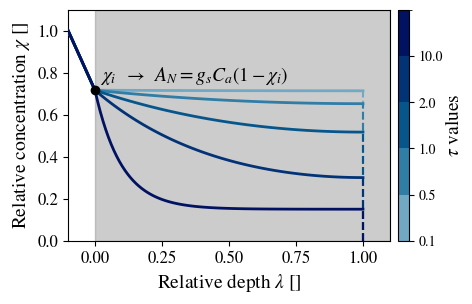

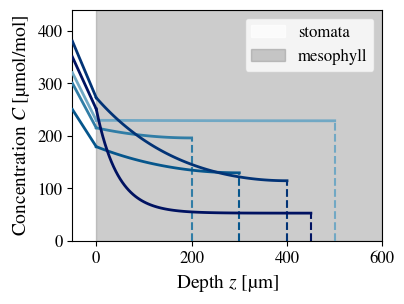

In [70]:
from matplotlib.colors import BoundaryNorm, ListedColormap



# create two figures for ease of editting in inkscape

# define dimensionless parameters
zeta_ = 0.15
sigma = 2
taus = np.array([0.1, 0.5, 1, 2, 10])
lambda_st = 0.1

# define solutions
zeta = lambda x, tau: zeta_ + (1-zeta_)/(1 + 1/sigma)*(np.cosh(tau*(1-x)))/(np.cosh(tau))
zeta_st = lambda x, tau: zeta(0, tau) + (zeta(0, tau) - 1)/lambda_st * x

# define domain list
lambdas = np.linspace(0, 1, 100)
lambdas_st = np.linspace(-lambda_st, 0, 10)

# create plot of rescaled profiles

fig, ax = plt.subplots(figsize=(5, 3))
colors = ['#001261', '#023376','#06568C', '#307DA6', '#71A8C4'][::-1]
stomata_color = 'white'
mesophyll_color = 'grey'
alpha = 1

# COLORS
# I : stomata
colorI = hex2rgb('71A8C4')      #hex2rgb('67a9b9')       #hex2rgb('00b9bd') #'teal' 
# II : absorption capacity
colorII = hex2rgb('EACEBD')      #hex2rgb('629076')      #hex2rgb('004853') #'darkgoldenrod'
# III : IAS
colorIII = hex2rgb('F8A17B')     #hex2rgb('dd7308')     #hex2rgb('f63700') #'seagreen'
#
point_colors = [hex2rgb('001261'), hex2rgb('226061'), hex2rgb('B40F20')]

for tau, color in zip(taus, colors):
    zetas = zeta(lambdas, tau)
    ax.plot(lambdas_st, zeta_st(lambdas_st, tau), color=color, linewidth=2, zorder=3)
    ax.plot(lambdas, zetas, color=color,  linewidth=2, zorder=3)
    ax.plot([1, 1], [0, zetas[-1]], color=color, linestyle='--', alpha = alpha)

ax.set_xlim(-lambda_st, 1.1)
ax.set_ylim(0, 1.1)

# pretty
fontsize = 14
ax.set_xlabel(r'Relative depth $\lambda$ []', fontsize=fontsize)
ax.set_ylabel(r'Relative concentration $\chi$ []', fontsize=fontsize)
# ax.set_title(r'Rescaled $CO_2$ concentration profiles', fontsize=fontsize)
ax.fill_betweenx([0, 1.1], -lambda_st, 0, color=stomata_color, alpha=0.4, label='stomatal domain', zorder=0)
ax.fill_betweenx([0, 1.1], 0, 1.1, color=mesophyll_color, alpha=0.4, label='mesophyll domain', zorder=0)

# add text and highlight Ci/Ca = 0.7
ax.text(0.02, 0.76, r'$\chi_i \;\; \rightarrow \;\; A_N = g_s C_a(1-\chi_i) $', fontsize=14)
ax.plot(0, 0.72, 'ko', zorder=3)

# Make the colormap discrete using BoundaryNorm and a listed colormap


# Define discrete boundaries for each tau
bounds = np.append(taus, taus[-1] + (taus[-1] - taus[-2]))  # add an upper bound

# Create a discrete colormap using the same colors as used for the lines
discrete_cmap = ListedColormap(colors)

# Create a norm that maps values to the correct color bin
norm = BoundaryNorm(bounds, discrete_cmap.N)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=discrete_cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, boundaries=bounds, ticks=taus)
cbar.set_label(r'$\tau$ values', fontsize=fontsize, labelpad=1)
cbar.ax.tick_params(labelsize=10)

plt.savefig('figs/2B_rescaled_profiles.svg')
plt.show()

#_____________________________________________________

# create show-case profiles in literature units

L_st = 50
C = lambda x, ca, L, tau : ca*zeta_ + (ca - ca*zeta_)/(1 + 1/sigma)*(np.cosh(tau*(1-x/L)))/(np.cosh(tau))
C_st = lambda x, ca, L, tau : C(0, ca, L, tau) + (C(0, ca, L, tau) - ca)/L_st * x

fig, ax = plt.subplots(figsize=(4, 3))

def plot(Ca, L, tau, color):
    x = np.linspace(0, L, 100)
    x_st = np.linspace(-L_st, 0, 10)
    ax.plot(x, C(x, Ca, L, tau), color=color, linewidth=2, alpha = alpha, zorder=3)
    ax.plot(x_st, C_st(x_st, Ca, L, tau), color=color, linewidth=2, alpha = alpha, zorder=3)
    ax.plot([L, L], [0, C(L, Ca, L, tau)], color=color, linestyle='--', alpha = alpha, zorder=3)

               # Ca   L
combinations = [(320, 500), 
                (300, 200), 
                (250, 300), 
                (380, 400), 
                (350, 450)]

for comb, tau, color in zip(combinations, taus, colors):
    plot(comb[0], comb[1], tau, color)


# pretty
ax.set_xlim(-L_st, 600)
ax.set_ylim(0, 440)
ax.set_xlabel(r'Depth $z$ [µm]', fontsize=fontsize)
ax.set_ylabel(r'Concentration $C$ [µmol/mol]', fontsize=fontsize)
# ax.set_title(r'Raw CO$_2$ concentration profiles', fontsize=fontsize)
ax.fill_betweenx([0, 440], -L_st, 0, color=stomata_color, alpha=0.7, label='stomata', zorder=0)
ax.fill_betweenx([0, 440], 0, 600, color=mesophyll_color, alpha=0.4, label='mesophyll', zorder=0)
ax.legend(fontsize=12)

# add a large arrow pointing to the right in ax1
# ax.annotate('', xy=(600, 275), xytext=(400, 275), arrowprops=dict(facecolor=color, shrink=0.05))

plt.savefig('figs/2A_raw_profiles.svg')
plt.show()

